In [1]:
pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\miamoako\appdata\local\packages\pythonsoftwarefoundation.python.3.8_qbz5n2kfra8p0\localcache\local-packages\python38\site-packages (20.2.4)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade mxnet==1.6 gluonts

Requirement already up-to-date: mxnet==1.6 in c:\users\miamoako\appdata\local\packages\pythonsoftwarefoundation.python.3.8_qbz5n2kfra8p0\localcache\local-packages\python38\site-packages (1.6.0)
Requirement already up-to-date: gluonts in c:\users\miamoako\appdata\local\packages\pythonsoftwarefoundation.python.3.8_qbz5n2kfra8p0\localcache\local-packages\python38\site-packages (0.5.2)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install shap 

  Using cached shap-0.36.0-cp38-cp38-win_amd64.whl (370 kB)

  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)


In [3]:
import sklearn
import shap 

In [63]:
import pandas as pd
import datetime
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)
print(df)

                     value
timestamp                 
2015-02-26 21:42:53     57
2015-02-26 21:47:53     43
2015-02-26 21:52:53     55
2015-02-26 21:57:53     64
2015-02-26 22:02:53     93
...                    ...
2015-04-22 20:32:53     51
2015-04-22 20:37:53     54
2015-04-22 20:42:53     46
2015-04-22 20:47:53     56
2015-04-22 20:52:53     50

[15831 rows x 1 columns]


FixedFormatter should only be used together with FixedLocator


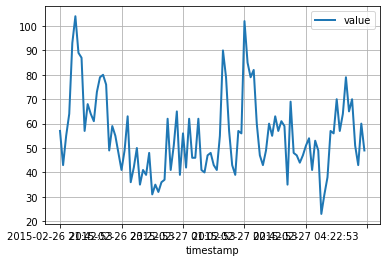

In [7]:
import matplotlib.pyplot as plt
df[:100].plot(linewidth=2)
plt.grid(which='both')
plt.show()

In [8]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"]}],
    freq = "5min"
)

In [93]:
"""
Produce the data above using pandas
"""
dti = pd.date_range('2015-02-26 21:40:00', "2015-04-05 00:00:00", freq='5min')
series = pd.Series((df.value[df.index[i]] for i in range(len(dti))), index=dti)
print(series)

2015-02-26 21:40:00    57
2015-02-26 21:45:00    43
2015-02-26 21:50:00    55
2015-02-26 21:55:00    64
2015-02-26 22:00:00    93
                       ..
2015-04-04 23:40:00    40
2015-04-04 23:45:00    44
2015-04-04 23:50:00    61
2015-04-04 23:55:00    59
2015-04-05 00:00:00    59
Freq: 5T, Length: 10685, dtype: int64


In [95]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

estimator = DeepAREstimator(freq="5min", prediction_length=12, trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=training_data)

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|████████████████████████████████████████████████| 50/50 [00:08<00:00,  5.90it/s, epoch=10/10, avg_epoch_loss=3.95]


With a 5min interval, we have 12 datapoints within each hour, and 24 hours for each day (288 datapoints for a full day). 

We look at data from '2015-02-26 21:40:00' to '2015-04-15 00:00:00'
There should be 13564 datapoints:

2015-02-26 21: 4 datapoints
2015-02-26 22, 23: 12 datapoints each
Number of days between (2015-02-27 and 2015-04-15): 47 days 

Given a prediction length of 12 (1 hour), we first plot the last 5 hours (60 datapoints) leading up to the hour of interest. For the hour of midnight on April 15th 2015, we plot the median along with selected confidence intervals (shaded in green).

2015-04-14 19:00:00     90.0
2015-04-14 19:05:00     67.0
2015-04-14 19:10:00     93.0
2015-04-14 19:15:00     79.0
2015-04-14 19:20:00     56.0
2015-04-14 19:25:00     57.0
2015-04-14 19:30:00     69.0
2015-04-14 19:35:00     71.0
2015-04-14 19:40:00     76.0
2015-04-14 19:45:00     62.0
2015-04-14 19:50:00     60.0
2015-04-14 19:55:00     59.0
2015-04-14 20:00:00    144.0
2015-04-14 20:05:00     68.0
2015-04-14 20:10:00     71.0
2015-04-14 20:15:00     67.0
2015-04-14 20:20:00     61.0
2015-04-14 20:25:00     77.0
2015-04-14 20:30:00     65.0
2015-04-14 20:35:00     64.0
2015-04-14 20:40:00     65.0
2015-04-14 20:45:00     54.0
2015-04-14 20:50:00     64.0
2015-04-14 20:55:00     53.0
2015-04-14 21:00:00     41.0
2015-04-14 21:05:00     47.0
2015-04-14 21:10:00     63.0
2015-04-14 21:15:00     55.0
2015-04-14 21:20:00     57.0
2015-04-14 21:25:00     72.0
2015-04-14 21:30:00     79.0
2015-04-14 21:35:00     90.0
2015-04-14 21:40:00     81.0
2015-04-14 21:45:00     80.0
2015-04-14 21:

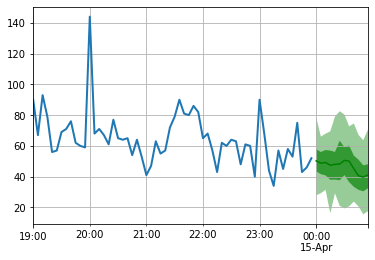

In [96]:
test_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-15 00:00:00"]}],
    freq = "5min"
)
from gluonts.dataset.util import to_pandas
#What is in the zip between test_data and predictions? 

test_data_shap=[]
for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    #print (to_pandas(test_entry)[-60:])
    test_data_shap = to_pandas(test_entry)
    #print(forecast)
    #print(forecast.median)
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0,90.0])
plt.grid(which='both')
print(forecast.median)
print(test_data_shap)


In [99]:
#To use SHAP, we model the above as Tabular data


"""
Paramenters: 

0. model: The model or function being used for predictions 
1. data: series.to_numpy() to convert time-series training data to numpy array
2. Link: 'identity'
"""
dti2 = pd.date_range('2015-04-15', periods=12, freq='5min')
print(dti2)

DatetimeIndex(['2015-04-15 00:00:00', '2015-04-15 00:05:00',
               '2015-04-15 00:10:00', '2015-04-15 00:15:00',
               '2015-04-15 00:20:00', '2015-04-15 00:25:00',
               '2015-04-15 00:30:00', '2015-04-15 00:35:00',
               '2015-04-15 00:40:00', '2015-04-15 00:45:00',
               '2015-04-15 00:50:00', '2015-04-15 00:55:00'],
              dtype='datetime64[ns]', freq='5T')


In [112]:
print(series)
print(type(predictor))
print(type(series))

2015-02-26 21:40:00    57
2015-02-26 21:45:00    43
2015-02-26 21:50:00    55
2015-02-26 21:55:00    64
2015-02-26 22:00:00    93
                       ..
2015-04-04 23:40:00    40
2015-04-04 23:45:00    44
2015-04-04 23:50:00    61
2015-04-04 23:55:00    59
2015-04-05 00:00:00    59
Freq: 5T, Length: 10685, dtype: int64
<class 'gluonts.model.predictor.RepresentableBlockPredictor'>
<class 'pandas.core.series.Series'>


In [115]:
explainer = shap.KernelExplainer(f, series)

shap_values = explainer.shap_values(test_data_shap)

# plot the SHAP values for the Time-series output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="identity")

AttributeError: 'generator' object has no attribute 'shape'